In [69]:
#TAKEN FROM: https://ee227c.github.io/code/lecture4.html#madness
%matplotlib inline
import os, struct
from array import array
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(1337)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)

def error_plot(ys, yscale='log'):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(len(ys)), ys, **kwargs)

In [70]:
#FROM: https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [71]:
mnist_labels = read_idx('train-labels.idx1-ubyte')
mnist_imgs = read_idx('train-images.idx3-ubyte')

C:\Users\jz124\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [72]:
def grad(x):
    x = np.reshape(x, (784,1))
    return np.dot(x,(np.dot(x.T,U)))

In [73]:
def proj(x):
    q, r = np.linalg.qr(x)
    return q

In [74]:
def gradient_descent(x, prev, eta):
    return proj(prev + eta * grad(x))

In [75]:
def calc_error(inp, mat):
    return np.linalg.norm(inp.T - np.dot(np.dot(mat, mat.T),inp.T), ord = 2)**2 #taking l2 norm gives smaller error

In [76]:
k = 2
U = np.linalg.qr(np.random.normal(0, 1, (784, k)))[0]

In [77]:
num_samples = 1000
num_epochs = 10
test = (mnist_imgs - np.mean(mnist_imgs, axis=0))/255
tmp = np.asarray(test, dtype=np.float64)
tmp = tmp.reshape((data.shape[0], -1), order='F')
train_data = tmp[0:num_samples]
test_data = tmp[num_samples:data.shape[0]]
for i in range(0, num_epochs):
    for j in range(0, num_samples):
        U = gradient_descent(train[j], U, 0.01)
training_error = (calc_error(train_data, U))/num_samples
print('Training Error:', training_error) #1/T of summation of all iterates after n epochs

Training Error: 4.0119077930870155


In [78]:
test_error = (calc_error(test_data, U))/test.shape[0]
print('Test Error: ', test_error)

Test Error:  3.6478143040769395


In [79]:
x = []
y = []
for i in range(test_data.shape[0]):
    s = np.dot(U.T,test_data[i])
    x.append(s[0])
    y.append(s[1])

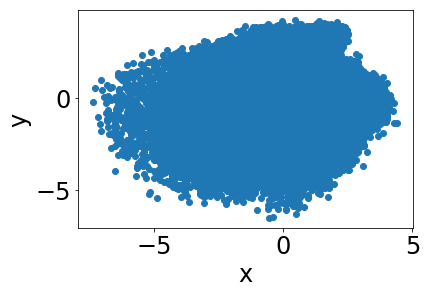

In [80]:
#projected data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()